In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


Data Collection and Analysis

In [7]:
# load the data from csv to pandas data file
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [8]:
#print first 5 rows 
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [10]:
# getting some info about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# statsitical measures for non-categorical values
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


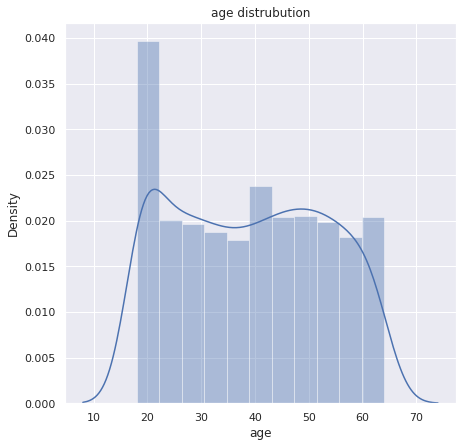

In [15]:
#distribution of age value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['age'])
plt.title('age distrubution')
plt.show()

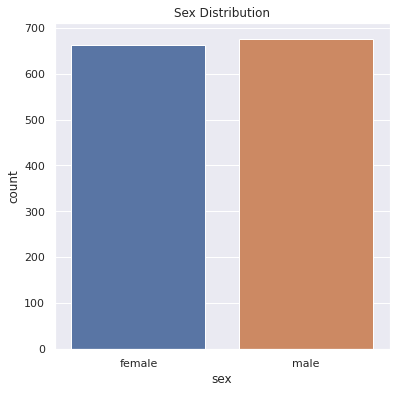

In [17]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [18]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


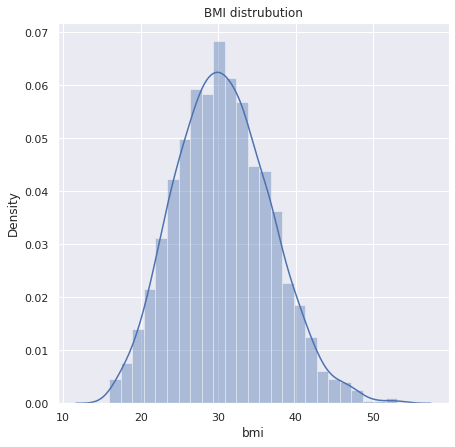

In [20]:
# bmi distribution
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distrubution')
plt.show()

Normal BMI range - 18 to 24


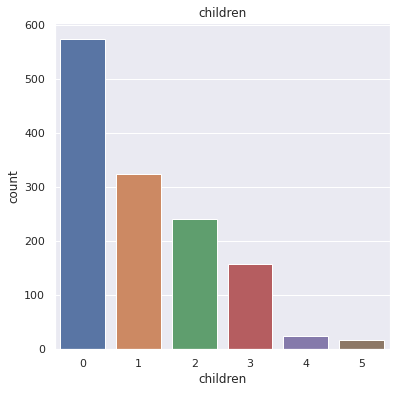

In [21]:
# children distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [22]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

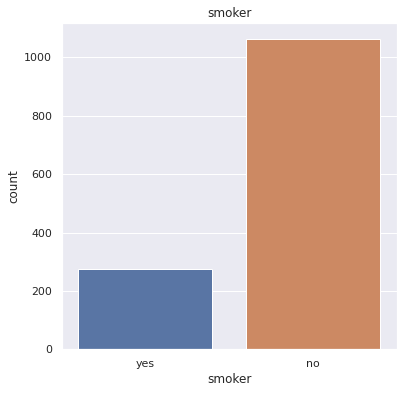

In [23]:
# smoke distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [25]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

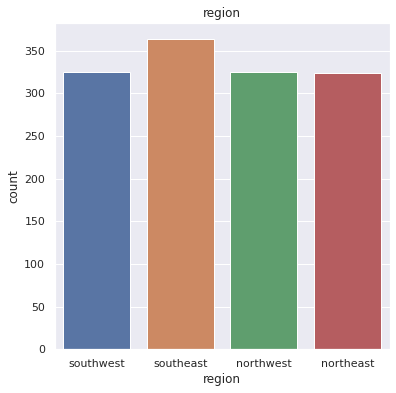

In [26]:
# region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [27]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


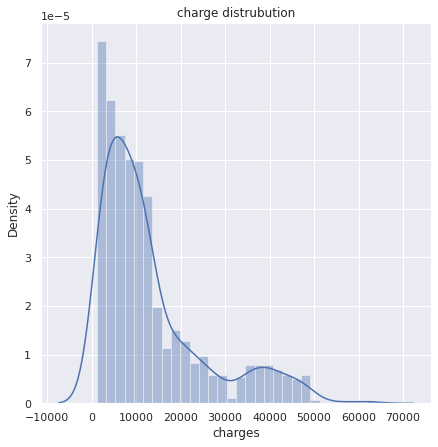

In [28]:
#charges distribution
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['charges'])
plt.title('charge distrubution')
plt.show()

Data Preprocessing

Encoding categorical Features

In [29]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker 
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [30]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting features and Target

In [31]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']


In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data into train and test data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 ,random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [39]:
# loading the linear regression model
regressor = LinearRegression()


In [40]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [41]:
# prediction on training data
training_data_pred = regressor.predict(X_train)

In [44]:
# R square
r2_train = metrics.r2_score(Y_train, training_data_pred)
print(r2_train)

0.751505643411174


In [45]:
# prediction on test data
test_data_pred = regressor.predict(X_test)

In [46]:
# R square
r2_test = metrics.r2_score(Y_test, test_data_pred)
print(r2_test)

0.7447273869684077


Build a Predictive system

In [48]:
input_data = (31,1,25.74,0,1,0)

# changing to numpy array
input_data_as_numpy_ar = np.asarray(input_data)

#reshape the array to only one data value
input_data_reshaped = input_data_as_numpy_ar.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction[0])

3760.0805764960587
